Bu, hipotez testlerinin en önemli ayrımıdır. Seçtiğiniz testin (ve sonucun) geçerliliği, bu iki kategoriden hangisini seçtiğinize bağlıdır.

### 1. Parametrik Testler (Ortalama Odaklı)

Bunlar, T-Testi, Z-Testi ve ANOVA gibi şu ana kadar konuştuğumuz en yaygın testlerdir.

* **Tanım:** Verilerinizin belirli bir **dağılıma** (genellikle **Normal Dağılım'a - Çan Eğrisi**) uyduğu varsayımına dayanan testlerdir.
* **Odak Noktası:** Grupların **ortalamalarını (mean)** karşılaştırır.
* **Gücü:** Merkezi Limit Teoremi (CLT) sayesinde çok güçlüdürler. Eğer bir fark varsa, onu tespit etme olasılıkları yüksektir.
* **Zayıflığı:** Veriniz normal dağılıma uymuyorsa veya aşırı aykırı değerler (outliers) içeriyorsa, bu testlerin sonuçları **tamamen yanıltıcı** olabilir. (Daha önce konuştuğumuz "Maaş ortalaması 104.500 TL" örneği gibi).

**Finans Örneği:**
Bitcoin ve Nasdaq'ın ortalama günlük getirilerini karşılaştırmak için **2 Örneklemli T-Testi** kullanmak parametrik bir yaklaşımdır.

### 2. Non-Parametrik Testler (Medyan/Sıra Odaklı)

Bunlar "dağılımsız" (distribution-free) testler olarak da bilinir.

* **Tanım:** Verinin dağılımı hakkında hiçbir varsayımda bulunmazlar.
* **Odak Noktası:** Genellikle **medyanları (median)** veya verilerin sıralamasını karşılaştırırlar.
* **Gücü:**
    1.  **Aykırı Değerlere (Outliers) Karşı Sağlamdır (Robust):** Kripto piyasasındaki ani %50'lik bir çöküş (outlier), bu testlerin sonucunu etkilemez çünkü medyanı değiştirmez.
    2.  Veri normal dağılmadığında (örneğin aşırı çarpık) kullanılmak zorundadırlar.
* **Zayıflığı:** Genellikle istatistiksel güçleri parametrik testlere göre biraz daha düşüktür (eğer veri normalse).

### 3. Hangi Durumda Hangisi Kullanılır? (Finans Örneği)

**Senaryo:** Yeni bir alım-satım algoritmasının Nasdaq'taki günlük getirilerini (performansını), eski algoritmanızla karşılaştırmak istiyorsunuz.

1.  **Önce Veriye Bakarsınız:** Yeni algoritmanın 50 günlük getiri verisini bir histograma dökersiniz.
2.  **Durum A: Veri Normal Dağılmışsa (Simetrik Çan Eğrisi)**
    * **Yöntem:** **Parametrik Test** kullanırsınız (Bağımsız T-Testi).
    * **Neden:** Veri "temiz" ve normal. Parametrik testin gücünden faydalanmak istersiniz.
3.  **Durum B: Veri Aşırı Çarpıksa (Birkaç Gün %30 Kâr, Diğer Günler %0.1 Kâr)**
    * **Yöntem:** **Non-Parametrik Test** kullanırsınız (Mann-Whitney U Testi).
    * **Neden:** O birkaç %30'luk kâr günü (outlier'lar), ortalamayı (mean) yapay olarak şişirecektir. T-testi yaparsanız, algoritmayı olduğundan çok daha iyi zannedersiniz. Medyanı karşılaştırmak daha dürüst bir sonuç verir.

### 4. Parametrik ve Non-Parametrik Karşılıkları (Eşleştirme)

| Parametrik Test (Ortalama karşılaştırır) | Non-Parametrik Test (Medyan/Sıra karşılaştırır) | Ne Yapar? |
| :--- | :--- | :--- |
| **Bağımsız T-Testi** | **Mann-Whitney U Testi** | 2 bağımsız grubun (Bitcoin vs Nasdaq) farkını test eder. |
| **Bağımlı (Paired) T-Testi** | **Wilcoxon Signed-Rank Testi** | 2 bağımlı grubun ("önce" vs "sonra") farkını test eder. |
| **Tek Yönlü ANOVA** | **Kruskal-Wallis Testi** | 3+ bağımsız grubun (Bitcoin vs Nasdaq vs Altın) farkını test eder. |
| (Pearson Korelasyon) | (Spearman Korelasyon) | İki değişken arasındaki ilişkiyi ölçer. |

**Özet:** Veriniz "temiz" ve simetrikse parametrik test (T-testi, ANOVA) kullanın. Veriniz "kirli" (outlier'lı) veya çarpıksa, non-parametrik test (Mann-Whitney) kullanın.


In [2]:
#from statsmodels.stats.weightstats import ztest
# veriler varsa 
from math import sqrt
from scipy.stats import norm

n = 40
x_bar = 525
sigma = 100
mu0 = 500

# Z istatistiği
z = (x_bar - mu0) / (sigma / sqrt(n))

# Tek kuyruklu p-değerleri
# H1: ortalama > mu0 ise (sağ kuyruk)
p_right = 1 - norm.cdf(z)

# H1: ortalama < mu0 ise (sol kuyruk)
p_left = norm.cdf(z)

# p-değeri (2 kuyruklu test)
p_twotail = 2 * (1 - norm.cdf(abs(z)))

print(f"Z istatistiği: {z:.3f}")
print(f"Sağ kuyruk p-değeri (H1: >): {p_right:.5f}")
print(f"Sol kuyruk p-değeri (H1: <): {p_left:.5f}")
print(f"İki kuyruklu p-değeri: {p_twotail:.5f}")

Z istatistiği: 1.581
Sağ kuyruk p-değeri (H1: >): 0.05692
Sol kuyruk p-değeri (H1: <): 0.94308
İki kuyruklu p-değeri: 0.11385


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
alcmean=df["alcohol"].mean()
def alcholmeter(row):
    alc = row["alcohol"]
    
    if alc > alcmean :
        return "HighAlcohol"
    else :
         return "LowAlcohol"
        

In [6]:
df["Alcohol_Category"] = df.apply(alcholmeter, axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Alcohol_Category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,LowAlcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,LowAlcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,LowAlcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,LowAlcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,LowAlcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,HighAlcohol
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,LowAlcohol
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,HighAlcohol
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,HighAlcohol


<Axes: xlabel='Alcohol_Category', ylabel='pH'>

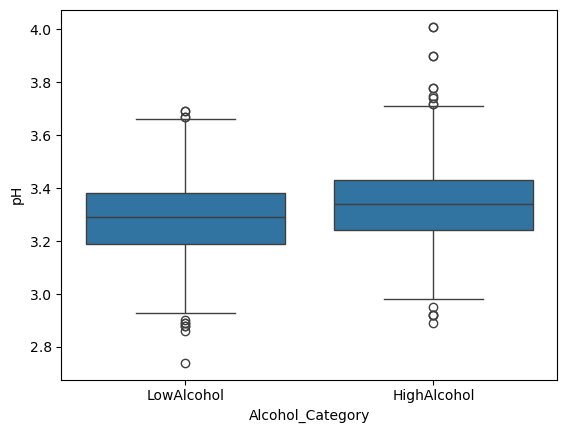

In [7]:
sns.boxplot(x="Alcohol_Category",y="pH",data =df)

<Axes: ylabel='pH'>

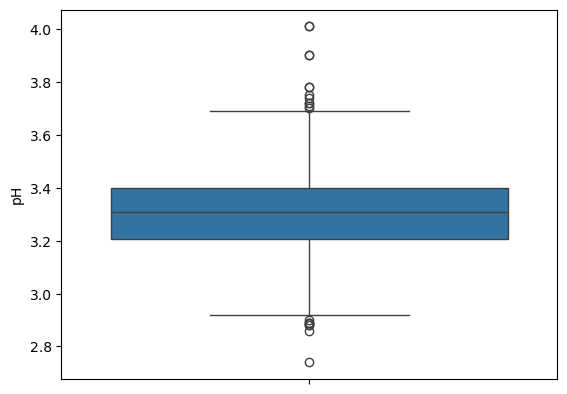

In [8]:
sns.boxplot(y=df["pH"])

<Axes: xlabel='residual sugar', ylabel='citric acid'>

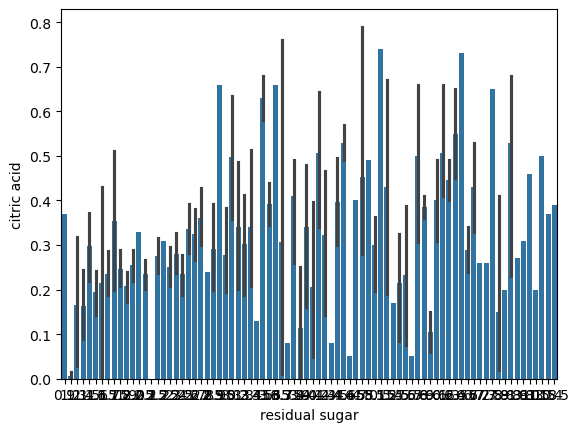

In [9]:
sns.barplot(x="residual sugar",y="citric acid",data = df)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'Alcohol_Category'],
      dtype='object')

<Axes: xlabel='citric acid', ylabel='pH'>

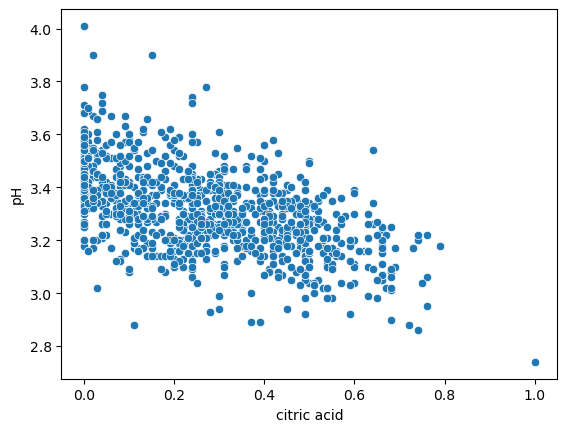

In [11]:
sns.scatterplot(x="citric acid",y="pH",data = df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  Alcohol_Category      1143 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 125.1+ KB


In [13]:
df = df.drop("Id", axis=1, errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Alcohol_Category      1143 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 116.2+ KB


In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Alcohol_Category        0
dtype: int64

In [16]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

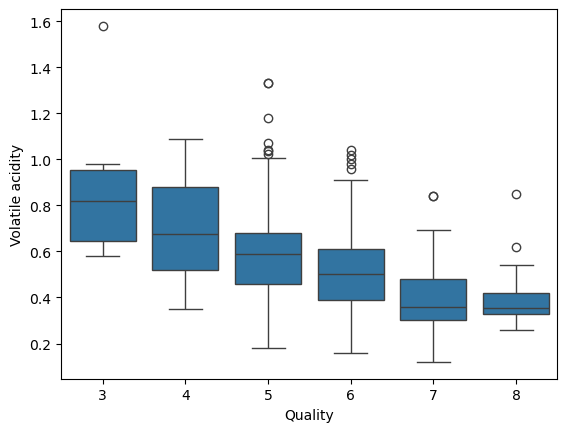

In [17]:
sns.boxplot(y="volatile acidity",x="quality",data=df)
plt.xlabel("Quality")
plt.ylabel("Volatile acidity")
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

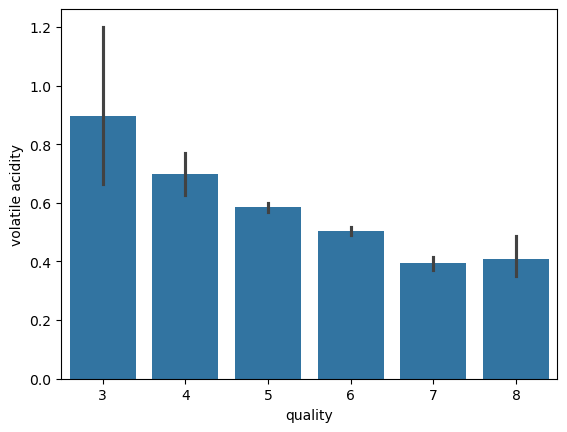

In [18]:
sns.barplot(y="volatile acidity",x="quality",data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

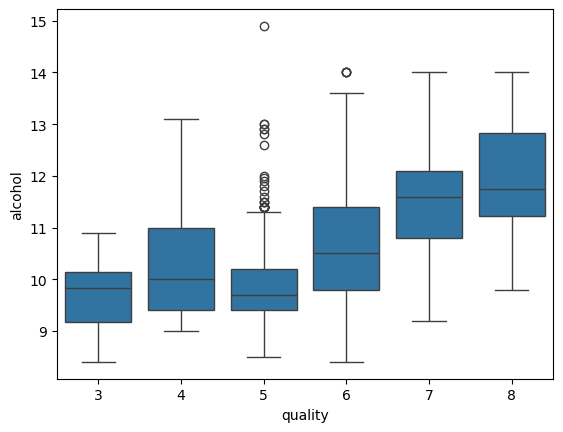

In [19]:
sns.boxplot(x="quality",y="alcohol",data = df)

In [20]:
corr_matrix = df.corr(numeric_only=True)

<Axes: >

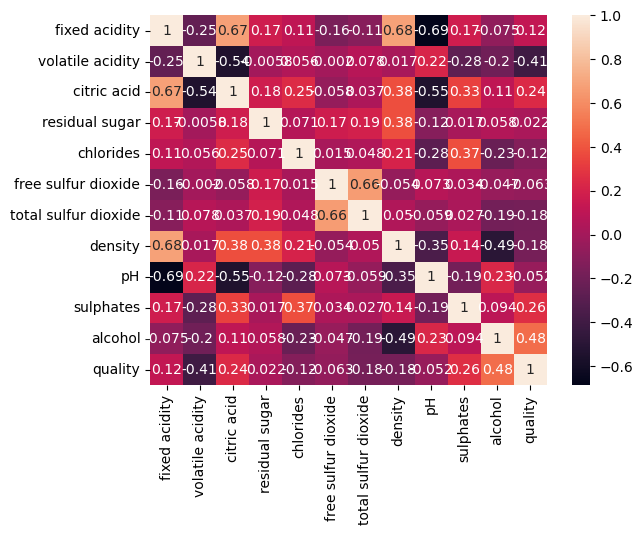

In [21]:
sns.heatmap(df.corr(numeric_only=True,),annot=True)

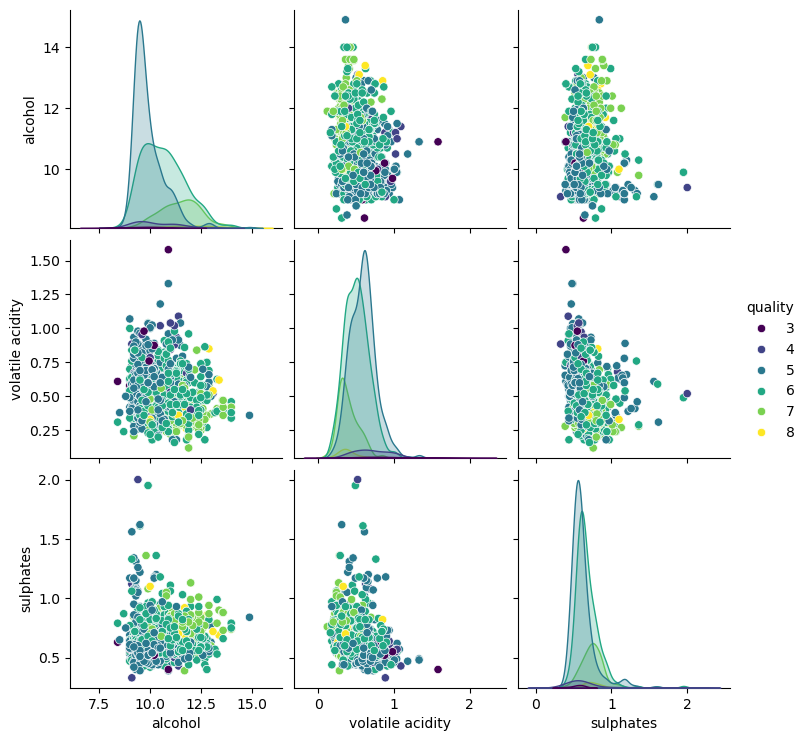

In [22]:
# En önemli 3 özelliği ve kaliteyi seçelim
cols = ['alcohol', 'volatile acidity', 'sulphates', 'quality']
sns.pairplot(df[cols], hue='quality', palette='viridis')
plt.show()

<Axes: xlabel='alcohol', ylabel='quality'>

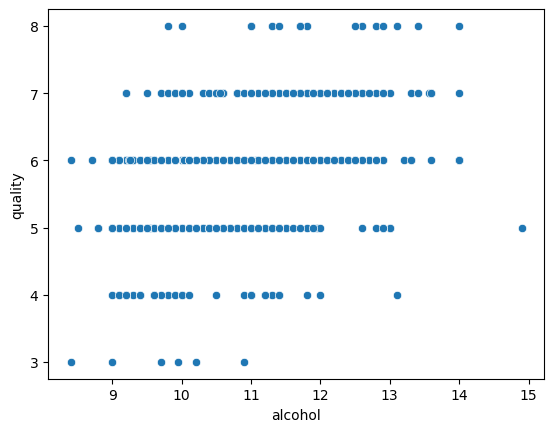

In [23]:
sns.scatterplot(x="alcohol",y="quality",data =df )

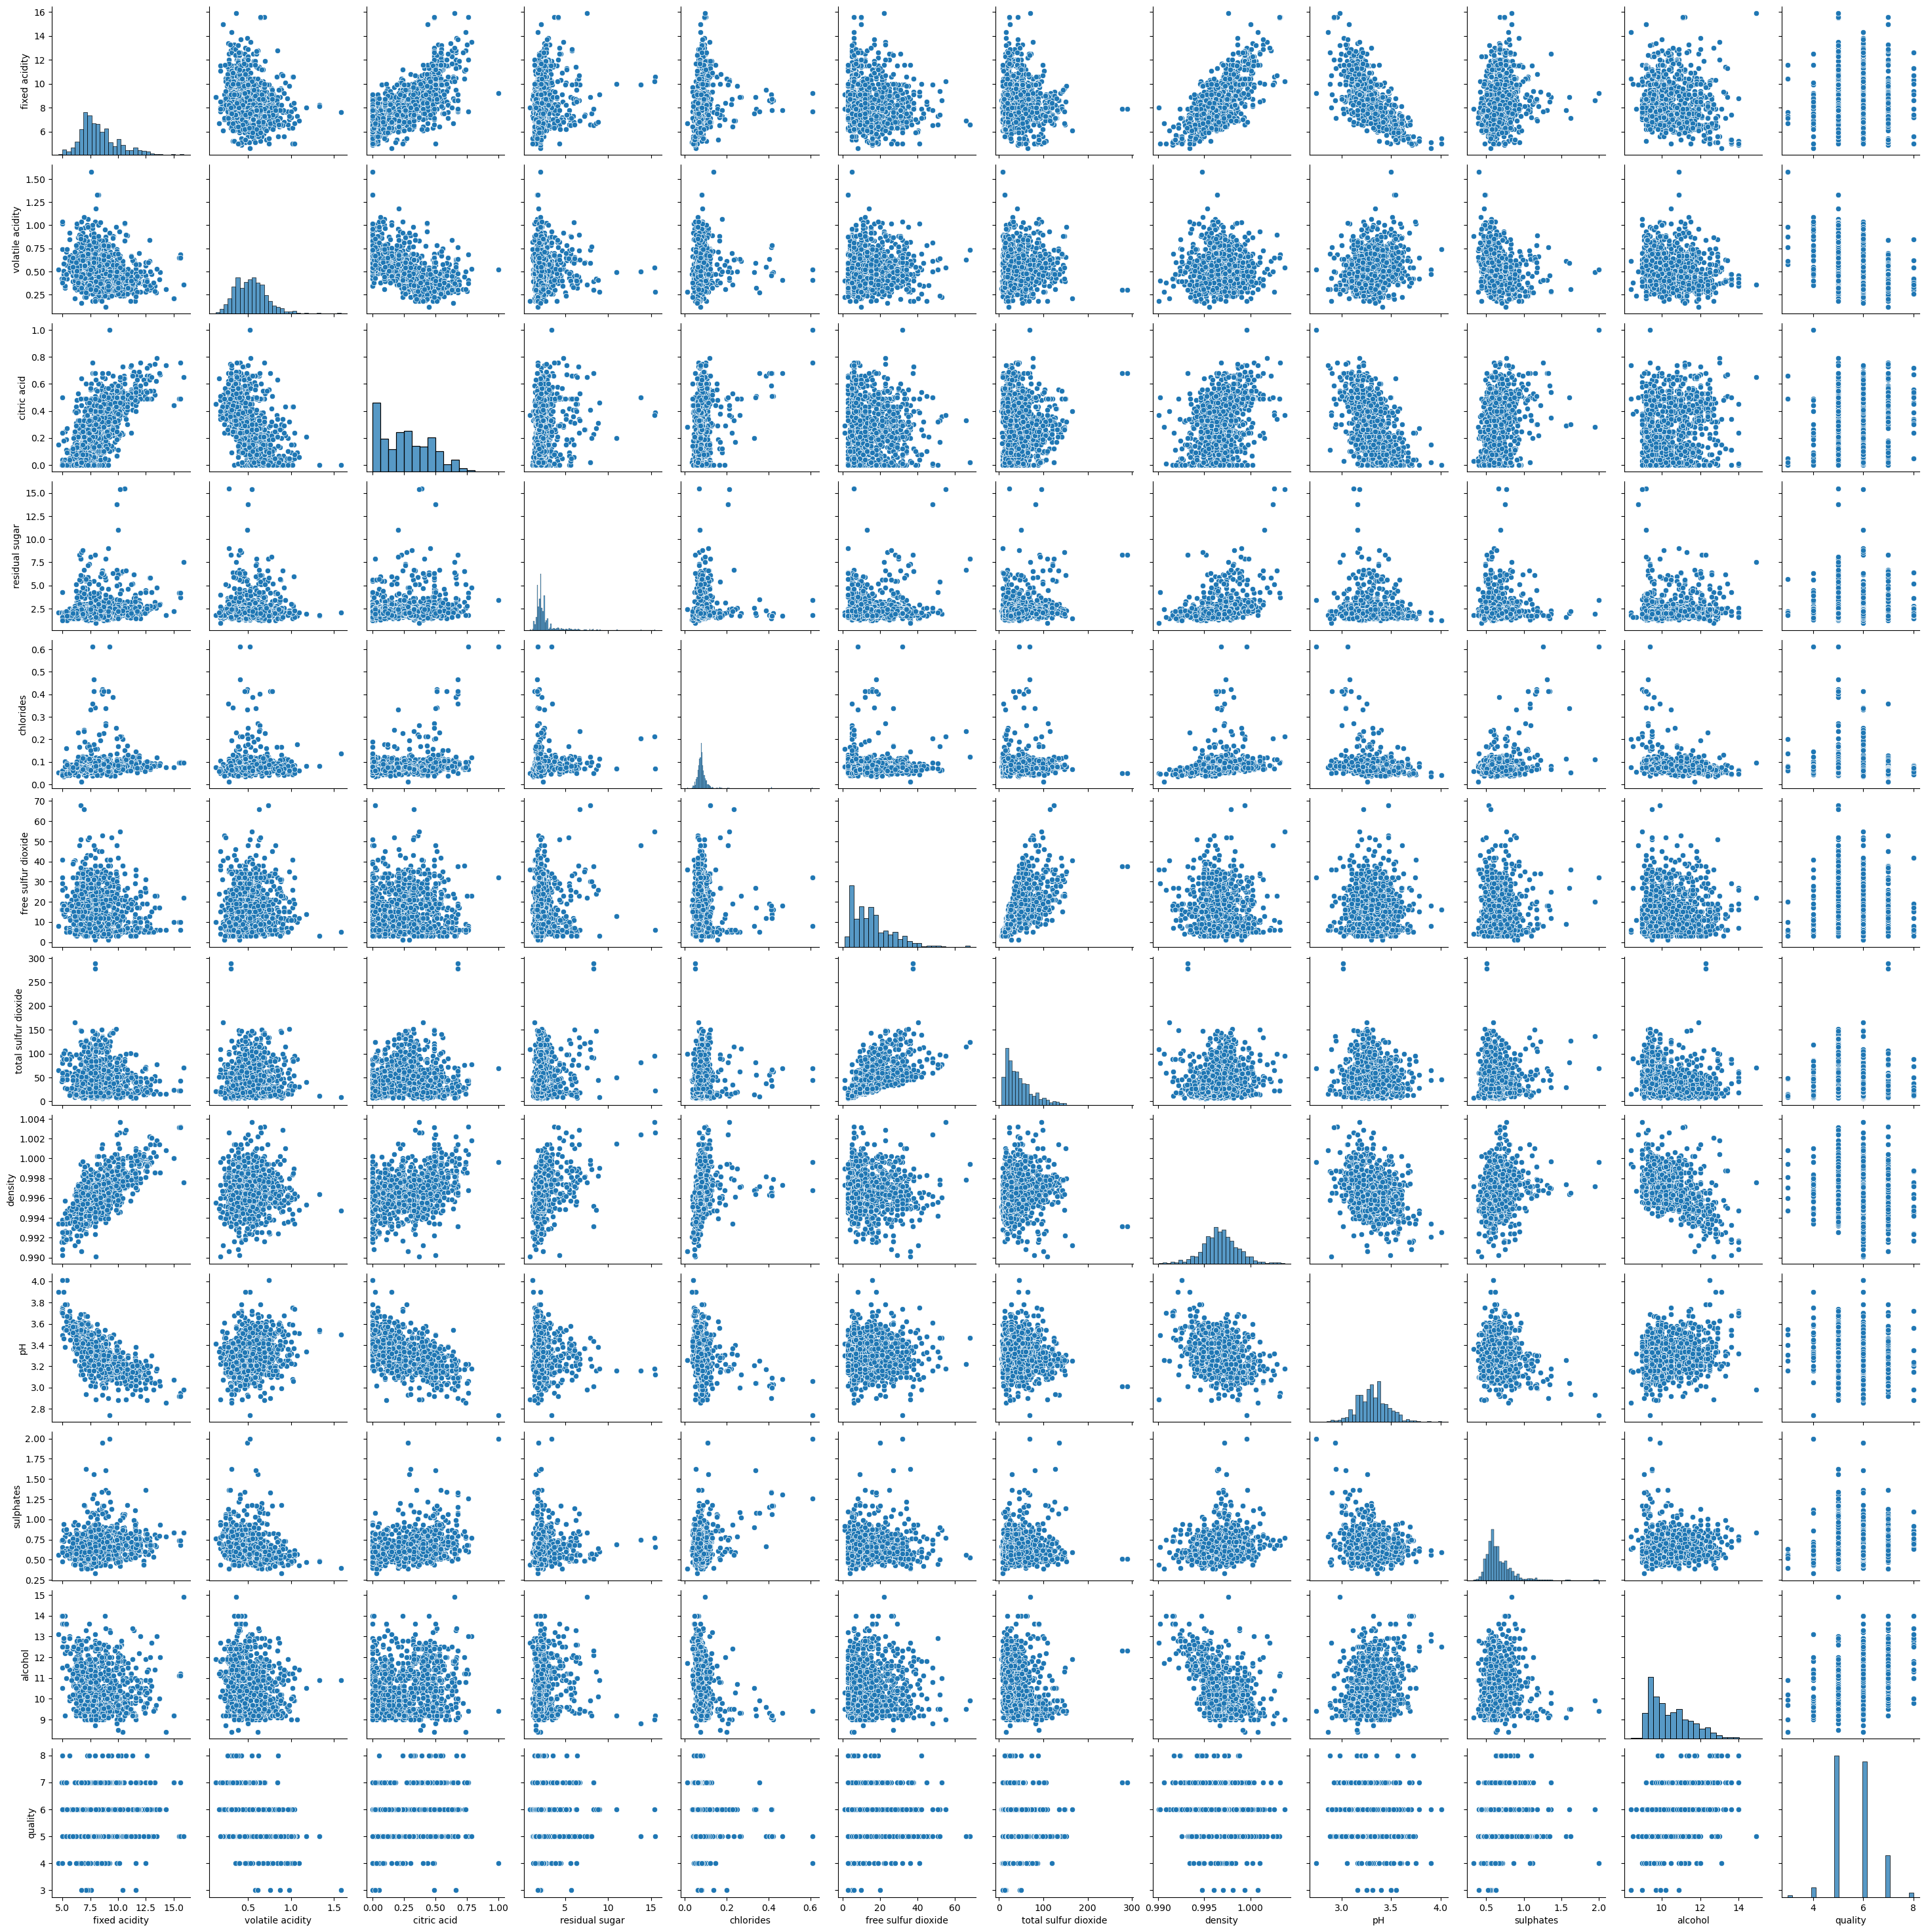

In [25]:
sns.pairplot(df)

<Axes: xlabel='fixed acidity', ylabel='density'>

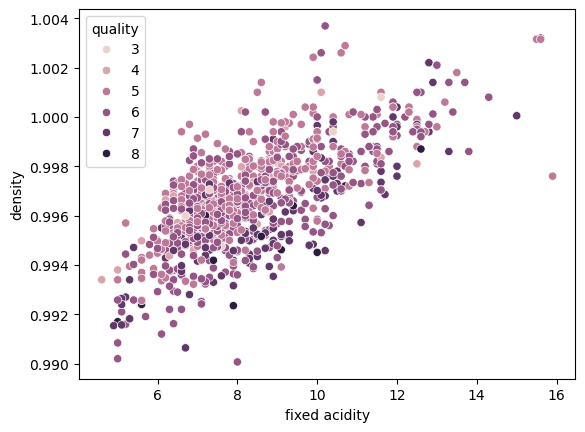

In [26]:
sns.scatterplot(x="fixed acidity",y="density",hue ="quality",data =df)

In [1]:
import pandas as pd
from scipy.stats import shapiro

# Veriyi yükle
df = pd.read_csv("WineQT.csv")

# Test edilecek sütunlar
columns_to_test = ['alcohol', 'pH', 'density']

print(f"{'DEĞİŞKEN':<15} | {'P-DEĞERİ':<10} | {'SONUÇ'}")
print("-" * 45)

for col in columns_to_test:
    # Shapiro-Wilk Testi
    stat, p_value = shapiro(df[col])
    
    # Sonucu Yorumlama
    if p_value > 0.05:
        sonuc = "NORMAL DAĞILIYOR (H0 Reddedilemez)"
    else:
        sonuc = "NORMAL DEĞİL (H0 Reddedildi)"
        
    print(f"{col:<15} | {p_value:.5f}    | {sonuc}")

print("-" * 45)
print("* Not: P-değeri 0.05'ten küçükse normal dağılım varsayımı bozulur.")

DEĞİŞKEN        | P-DEĞERİ   | SONUÇ
---------------------------------------------
alcohol         | 0.00000    | NORMAL DEĞİL (H0 Reddedildi)
pH              | 0.00001    | NORMAL DEĞİL (H0 Reddedildi)
density         | 0.00000    | NORMAL DEĞİL (H0 Reddedildi)
---------------------------------------------
* Not: P-değeri 0.05'ten küçükse normal dağılım varsayımı bozulur.
